<h1><center>Machine Learning Project - AVAZU<center></h1>


In [1]:
import sys
from zipfile import ZipFile
import os.path as op
try:
    from urllib.request import urlretrieve
except ImportError:  # Python 2 compat
    from urllib import urlretrieve

AVAZU_URL = "https://bianchi.wp.imt.fr/files/2019/05/train-1000000.zip"
AVAZU_FILENAME = AVAZU_URL.rsplit('/', 1)[1]


if not op.exists(AVAZU_FILENAME):
    print('Downloading %s to %s...' % (AVAZU_URL, AVAZU_FILENAME))
    urlretrieve(AVAZU_URL, AVAZU_FILENAME)
    ZipFile(AVAZU_FILENAME).extractall('.')

In [2]:
ZipFile(AVAZU_FILENAME).extractall('.')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

Data description here: https://www.kaggle.com/c/avazu-ctr-prediction/data  


In [4]:
df = pd.read_csv('train-1000000')

##Work assignment

1.   Perform Exploratory Data Analysis (EDA)
2.   Predict the probability that an add is clicked, based on the features.
3.   Evaluate the performance of your method.

##Work evaluation

Your work will be evaluated based on:

*   The interest of the EDA (4 points)
*   The quality of the comments/remarks throughout the notebook (4 points)
*   The feature engineering (5 points)
*   The efforts made in trying several predictors and tuning them (5 points)
*   The relevance of the performance criteria used to conclude (2 points)
*   BONUS (+1pt) : Register to the AVAZU challenge in Kaggle. What is your rank?

You may find the following script useful to convert the raw time stamp into a more useable feature. For instance, you may generate new pandas series using the code:

```
df['hour'].apply(lambda x:datesplit(x).weekday())
df['hour'].apply(lambda x:datesplit(x).hour)
```



In [5]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)

    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])

    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

# **EXPLORATORY DATA ANALYSIS**

In [6]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   id                1000000 non-null  float64
 1   click             1000000 non-null  int64  
 2   hour              1000000 non-null  int64  
 3   C1                1000000 non-null  int64  
 4   banner_pos        1000000 non-null  int64  
 5   site_id           1000000 non-null  object 
 6   site_domain       1000000 non-null  object 
 7   site_category     1000000 non-null  object 
 8   app_id            1000000 non-null  object 
 9   app_domain        1000000 non-null  object 
 10  app_category      1000000 non-null  object 
 11  device_id         1000000 non-null  object 
 12  device_ip         1000000 non-null  object 
 13  device_model      1000000 non-null  object 
 14  device_type       1000000 non-null  int64  
 15  device_conn_type  1000000 non-null  int64  
 16  C

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,9.226511e+18,0.169971,1.410256e+07,1004.968549,0.288466,1.015506,0.332436,18835.759473,318.888112,60.030918,2111.794488,1.432802,226.940103,53163.356361,83.404070
std,5.322835e+18,0.375608,2.966148e+02,1.096112,0.505974,0.527867,0.856103,4966.228494,21.279475,47.174174,610.393836,1.325815,350.944666,49960.216178,70.326773
min,1.003272e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.613978e+18,0.000000,1.410230e+07,1005.000000,0.000000,1.000000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.238351e+18,0.000000,1.410260e+07,1005.000000,0.000000,1.000000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100048.000000,61.000000
75%,1.384023e+19,0.000000,1.410281e+07,1005.000000,1.000000,1.000000,0.000000,21894.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100088.000000,101.000000
max,1.844670e+19,1.000000,1.410302e+07,1012.000000,7.000000,5.000000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000


Categorical data: site_id, site_domain, site_category, app_id, app_domain, app_category, device_id, device_ip, device_model, click
<br>Numerical data:  device_type, device_conn_type, id,  hour, banner_pos, C1, C14-C21, weekday
<br> All data available are non-null.

In [7]:
df['click'].mean() # based on the value below, we see that there is a low click rate when not accounting for any other factors.

np.float64(0.169971)

In [8]:
df.nunique() # here are all the possible values for each category. we notice that the "hour" variable has a lot of options, so we may want to decrease that.

,0
id,1000000
click,2
hour,240
C1,7
banner_pos,7
site_id,2651
site_domain,2871
site_category,22
app_id,3157
app_domain,198


In [9]:
df['hour'].head()
df['hour'].tail() # We see below that there the hours are split very specifically, and we want to categorize them into new columns (hours, days, time)

,hour
999995,14102602
999996,14102101
999997,14102318
999998,14102908
999999,14102600


In [10]:
df['datetime'] = df['hour'].apply(datesplit)
df['weekday'] = df['datetime'].apply(lambda x: x.weekday())
df['hour_of_day'] = df['datetime'].apply(lambda x: x.hour)
df.drop(columns=['hour','datetime'], inplace=True)
df.head()

,id,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,C14,C15,C16,C17,C18,C19,C20,C21,weekday,hour_of_day
0,3.983206e+18,0,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,...,4687,320,50,423,2,39,100148,32,2,15
1,7.756884e+18,0,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,07d7df22,...,17894,320,50,2039,2,39,100077,32,3,7
2,6.941774e+17,0,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,cef3e649,...,22684,320,50,2619,1,163,100055,71,0,11
3,2.664154e+18,1,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,0f2161f8,...,23222,320,50,2676,0,35,100176,221,2,3
4,1.480510e+19,0,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,07d7df22,...,8330,320,50,761,3,175,100081,23,2,2


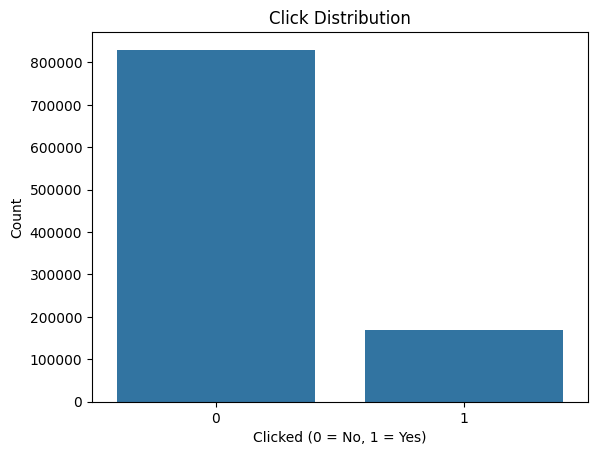

In [11]:
click_counts = df['click'].value_counts()
sns.barplot(x=click_counts.index, y=click_counts.values)
plt.title('Click Distribution')
plt.xlabel('Clicked (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# We have more data on people who did not click versus people who did click.

In [12]:
df.groupby("site_category")['click'].mean()

# dedf689d has the highest click rate, and 3e814130 and 42a36e14 have the next highest click rates.
# Some site categories have a click rate of 0.0, like 5378d028, 9ccfa2ea, and a818d37a, amongst others.

,click
site_category,
0569f928,0.053613
28905ebd,0.208076
335d28a8,0.089824
3e814130,0.284245
42a36e14,0.225806
50e219e0,0.128597
5378d028,0.000000
70fb0e29,0.144737
72722551,0.059172


In [13]:
df.groupby("banner_pos")['click'].mean()

# The banner position of 7 has the highest click rate at 31.28% compared with banner postion of 0 and 1 with a click rate of 16.43% and 18.41% respectively.

,click
banner_pos,
0,0.164342
1,0.184086
2,0.107362
3,0.136364
4,0.119318
5,0.106870
7,0.312849


In [14]:
df.groupby("device_type")['click'].mean()

# Device type 0 an 1 have the highest click rate, while device type 2 has a click rate of 0%.

,click
device_type,
0,0.211157
1,0.169329
2,0.000000
4,0.096546
5,0.089168


In [15]:
df.groupby("app_category")['click'].mean()

# a7fd01ec has the highest click rate.

,click
app_category,
07d7df22,0.199420
09481d60,0.157520
0bfbc358,0.000000
0f2161f8,0.108475
0f9a328c,0.162602
18b1e0be,0.000000
2281a340,0.000000
2fc4f2aa,0.000000
4681bb9d,0.138365


# **FEATURE SELECTION**

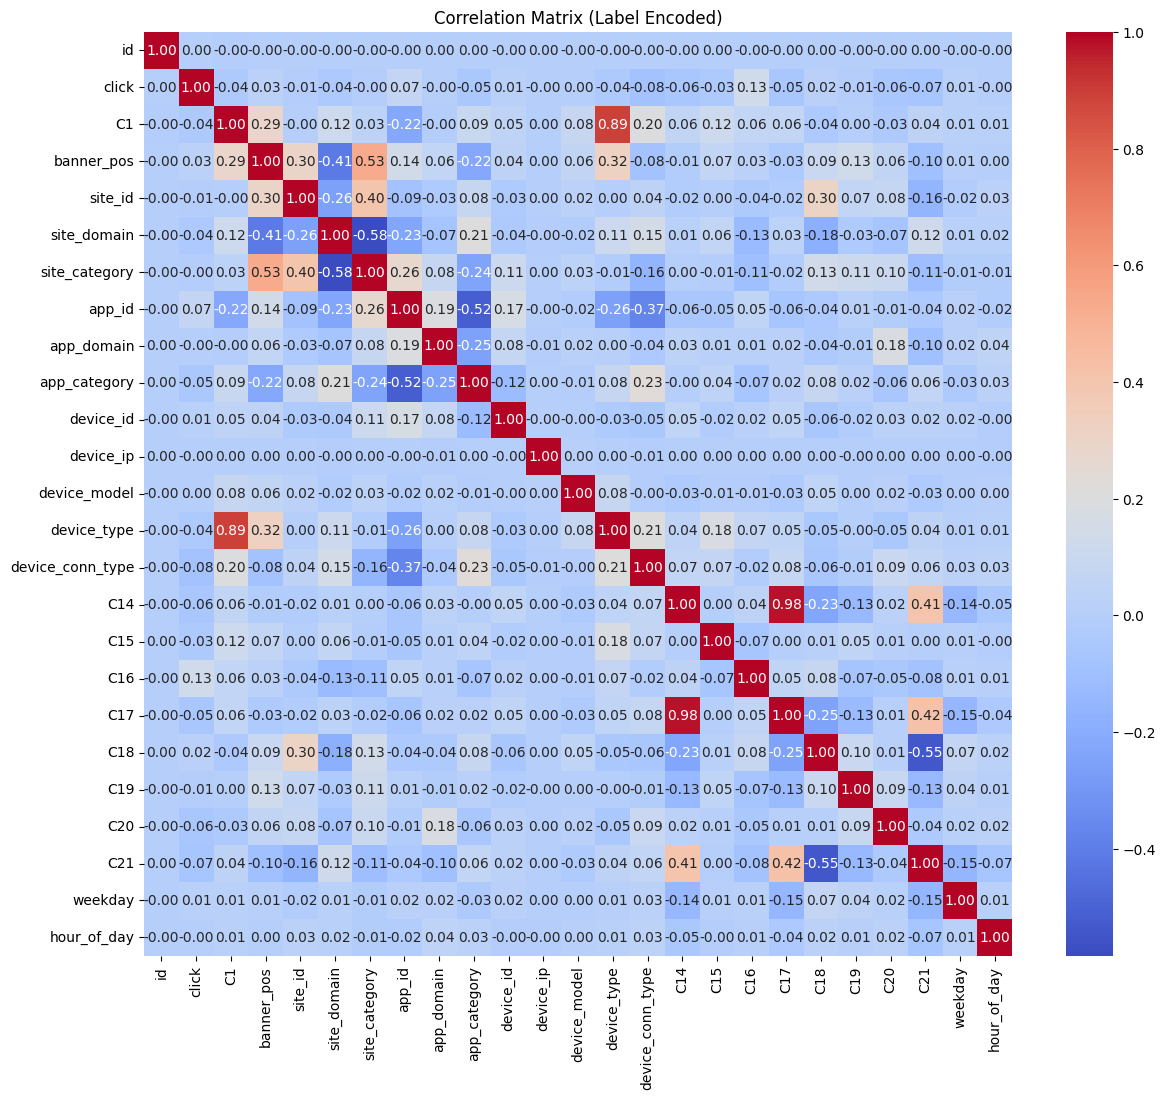

In [16]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Calculate correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix (Label Encoded)")
plt.show()


In [17]:
# drop highly correlated variables -- remove redundant info & prevent multicollinearity
df.drop(columns=['device_type','C1', 'C14', 'C17','site_category', 'app_domain', 'device_model', 'hour_of_day','site_domain'])

,id,click,banner_pos,site_id,app_id,app_category,device_id,device_ip,device_conn_type,C15,C16,C18,C19,C20,C21,weekday
0,3.983206e+18,0,1,2311,2911,0,99837,545387,2,320,50,2,39,100148,32,2
1,7.756884e+18,0,0,2084,2911,0,91479,374125,0,320,50,2,39,100077,32,3
2,6.941774e+17,0,0,1363,2867,21,99837,252593,0,320,50,1,163,100055,71,0
3,2.664154e+18,1,0,1363,2045,3,99837,358190,0,320,50,0,35,100176,221,2
4,1.480510e+19,0,1,1242,2911,0,99837,464279,0,320,50,3,175,100081,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1.160473e+19,0,0,956,2911,0,99837,335513,0,300,250,2,39,-1,33,6
999996,2.530099e+18,1,0,322,2911,0,99837,128667,0,320,50,0,35,-1,79,1
999997,8.916528e+18,0,1,2539,2911,0,99837,76702,0,320,50,3,39,-1,23,3
999998,1.307924e+19,0,1,936,2911,0,99837,131343,0,320,50,0,935,-1,48,2


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:32:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


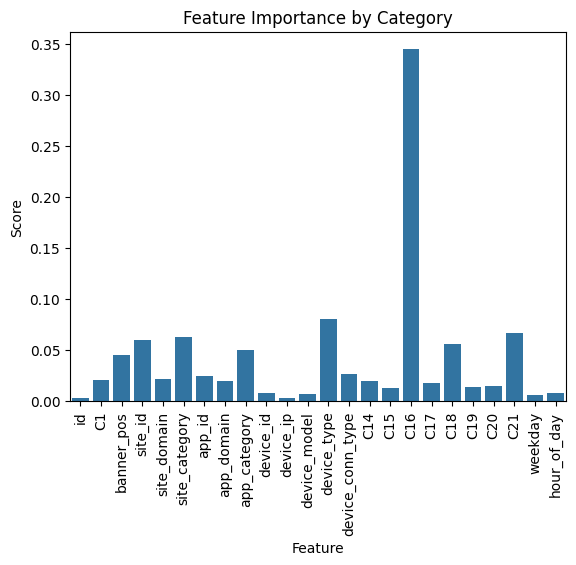

In [18]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
X = df.drop(columns=['click'])
y = df['click']
X = X.apply(lambda col: col.astype('category').cat.codes if col.dtypes == 'object' else col)
model.fit(X, y)

imp = model.feature_importances_

plt.figure()
sns.barplot(x=X.columns, y=imp)
plt.xticks(rotation=90)
plt.title("Feature Importance by Category")
plt.xlabel("Feature")
plt.ylabel("Score")
plt.show()

# Based on the graph below and the correlation matrix above, we see that C16 seems to be the most strongly correlated to click rate.
# We also see that device type  and C21 and site cateogry have a strong indication.

# ID, device IP, device ID have the lowest correlation score and xgboost score.

In [19]:
df.drop(columns=['id', 'device_ip','device_id','weekday'])

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,hour_of_day
0,0,1005,1,2311,1426,20,2911,90,0,3815,...,2,4687,320,50,423,2,39,100148,32,15
1,0,1002,0,2084,1325,5,2911,90,0,2536,...,0,17894,320,50,2039,2,39,100077,32,7
2,0,1005,0,1363,2232,5,2867,174,21,1217,...,0,22684,320,50,2619,1,163,100055,71,11
3,1,1005,0,1363,2232,5,2045,140,3,3978,...,0,23222,320,50,2676,0,35,100176,221,3
4,0,1005,1,1242,2833,20,2911,90,0,3353,...,0,8330,320,50,761,3,175,100081,23,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,1005,0,956,1347,3,2911,90,0,2102,...,0,19016,300,250,2162,2,39,-1,33,2
999996,1,1005,0,322,2737,1,2911,90,0,3984,...,0,15701,320,50,1722,0,35,-1,79,1
999997,0,1005,1,2539,1222,20,2911,90,0,2346,...,0,16615,320,50,1863,3,39,-1,23,18
999998,0,1005,1,936,2153,20,2911,90,0,1255,...,0,19772,320,50,2227,0,935,-1,48,8


# **MODELS & EVALUATIONS**

# LOGISTIC REGRESSION

1. Using only 1 predictor: C16 since it has the highest importance score from above.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# ONLY 1 preidctior
X = df[['C16']]
y = df[['click']]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8286066666666667
Precision: 0.22871664548919948
Recall: 0.003530034712008001
ROC AUC: 0.5398328885293191
Confusion Matrix:
 [[248402    607]
 [ 50811    180]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    249009
           1       0.23      0.00      0.01     50991

    accuracy                           0.83    300000
   macro avg       0.53      0.50      0.46    300000
weighted avg       0.73      0.83      0.75    300000



2. Using all predictors

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

target = 'click'
X = df.drop(columns=[target])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8288966666666666
Precision: 0.25290697674418605
Recall: 0.0034123668882744015
ROC AUC: 0.6271944714820799
Confusion Matrix:
 [[248495    514]
 [ 50817    174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    249009
           1       0.25      0.00      0.01     50991

    accuracy                           0.83    300000
   macro avg       0.54      0.50      0.46    300000
weighted avg       0.73      0.83      0.75    300000



3. Using only predictors that do not include any variable with a 0.0 correlation with clicks.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day' ])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8288566666666667
Precision: 0.24639769452449567
Recall: 0.0033535329764076013
ROC AUC: 0.6268835358877485
Confusion Matrix:
 [[248486    523]
 [ 50820    171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    249009
           1       0.25      0.00      0.01     50991

    accuracy                           0.83    300000
   macro avg       0.54      0.50      0.46    300000
weighted avg       0.73      0.83      0.75    300000



4. Using same predictors as #3 but resampling to have the same number of X and y values for training

In [23]:
target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day' ])
y = df[target]

# downsample y to have the same number of samples as X
y_sampled = y.sample(n=len(X), random_state=42)

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.3, random_state=42, stratify=y_sampled)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.83003
Precision: 0.0
Recall: 0.0
ROC AUC: 0.49719366079031535
Confusion Matrix:
 [[249009      0]
 [ 50991      0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91    249009
           1       0.00      0.00      0.00     50991

    accuracy                           0.83    300000
   macro avg       0.42      0.50      0.45    300000
weighted avg       0.69      0.83      0.75    300000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Use balanced class weights -- attempt to increase recall and precision scores

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day' ])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the logistic regression model -- BALANCED class weight
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# predict
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# noticing a much higher recall score than previous attempts

Accuracy: 0.5779533333333333
Precision: 0.2231569544812236
Recall: 0.5977329332627327
ROC AUC: 0.6275690316440257
Confusion Matrix:
 [[142907 106102]
 [ 20512  30479]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.57      0.69    249009
           1       0.22      0.60      0.32     50991

    accuracy                           0.58    300000
   macro avg       0.55      0.59      0.51    300000
weighted avg       0.76      0.58      0.63    300000



6. attempting SMOTE to balance training data

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day'])
y = df[target]

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train using balanced weight
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# make predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

# noticed a higher accuracy, but lower AUC score.

Accuracy: 0.6066966666666667
Precision: 0.20564459440461128
Recall: 0.4589829577768626
ROC AUC: 0.586938354964214
Confusion Matrix:
 [[158605  90404]
 [ 27587  23404]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.64      0.73    249009
           1       0.21      0.46      0.28     50991

    accuracy                           0.61    300000
   macro avg       0.53      0.55      0.51    300000
weighted avg       0.74      0.61      0.65    300000



7. Attempting to increase accuracy rate by testing different thresholds.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day' ])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize and train the logistic regression model -- BALANCED class weight
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)

# predictions
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


# evaluate
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for t in thresholds:
    y_pred = (y_pred_proba >= t).astype(int)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Threshold: {t:.2f} | Accuracy: {accuracy:.4f} | AUROC: {roc_auc:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f}")



Threshold: 0.30 | Accuracy: 0.2431 | AUROC: 0.6276 | Precision: 0.1805 | Recall: 0.9753
Threshold: 0.40 | Accuracy: 0.3299 | AUROC: 0.6276 | Precision: 0.1898 | Recall: 0.9003
Threshold: 0.50 | Accuracy: 0.5780 | AUROC: 0.6276 | Precision: 0.2232 | Recall: 0.5977
Threshold: 0.60 | Accuracy: 0.7954 | AUROC: 0.6276 | Precision: 0.3139 | Recall: 0.1719
Threshold: 0.70 | Accuracy: 0.8238 | AUROC: 0.6276 | Precision: 0.4259 | Recall: 0.1047


# RANDOM FOREST

Using the predictors from Logistic Regression above that had the highest model ROC AUC score.

In [28]:
from sklearn.ensemble import RandomForestClassifier

target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day'])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# predict
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Random Forest Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Evaluation:
Accuracy: 0.8174433333333333
Precision: 0.38819140116072487
Recall: 0.12855209742895804
ROC AUC: 0.688498150403368
Confusion Matrix:
 [[238678  10331]
 [ 44436   6555]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.96      0.90    249009
           1       0.39      0.13      0.19     50991

    accuracy                           0.82    300000
   macro avg       0.62      0.54      0.55    300000
weighted avg       0.77      0.82      0.78    300000



# XGBOOST

In [29]:
from xgboost import XGBClassifier
target = 'click'
X = df.drop(columns=[target, 'site_category', 'app_domain', 'device_model', 'hour_of_day'])
y = df[target]

# train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scale class imbalance
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# train model
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# predict
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("XGBoost Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:42:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Evaluation:
Accuracy: 0.6148433333333333
Precision: 0.2710974952486313
Recall: 0.7497009276146771
ROC AUC: 0.7292250615502727
Confusion Matrix:
 [[146225 102784]
 [ 12763  38228]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72    249009
           1       0.27      0.75      0.40     50991

    accuracy                           0.61    300000
   macro avg       0.60      0.67      0.56    300000
weighted avg       0.81      0.61      0.66    300000

